# Seperating stock to forcast for certain dates depending on the product

In [1]:
%pip install nbformat pandas numpy matplotlib seaborn scikit-learn xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
import sys
sys.path.append('../../src')

In [4]:
from data_config import ProductHandler as ph

d:\SCM---ML-Visualisation\notebooks\neural_network\../../src\datasets.py:13: DtypeWarning: Columns (4,6,20,50,52) have mixed types. Specify dtype option on import or set low_memory=False.
  products_s = pd.read_csv(
d:\SCM---ML-Visualisation\notebooks\neural_network\../../src\datasets.py:15: DtypeWarning: Columns (5,29,42,48) have mixed types. Specify dtype option on import or set low_memory=False.
  tickets_c_i = pd.read_csv(
d:\SCM---ML-Visualisation\notebooks\neural_network\../../src\datasets.py:18: DtypeWarning: Columns (43,57,106,141,146,211,212,247,255,294,298,316,327,332,350,354) have mixed types. Specify dtype option on import or set low_memory=False.
  tickets_c_m = pd.read_csv(
d:\SCM---ML-Visualisation\notebooks\neural_network\../../src\datasets.py:21: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  sp_inv_adds = pd.read_csv(


----- DROP BOOLEAN AND NULL COLUMNS (NOT NEEDED) -----

Merged Data - Columns to be dropped (Missing Vals): ['BackStage_DefaultReportForm', 'BackStage_SmartMarkSet', 'BillCounty', 'CoreType', 'EndUserNum', 'EndUserPO', 'Equip3_ID', 'Equip3_Status', 'Est_v_Act_Notes', 'Ink_Status', 'JDF_Note_to_DFE', 'JDF_Send_Msg', 'MiscChargeDesc1', 'MiscChargeDesc2', 'MiscChargeDesc3', 'MiscChargeDesc4', 'PlateStat', 'ProofStat', 'Roto_CEL_Product_ID', 'Roto_Quote_Line_ID', 'Roto_Quote_Number', 'Schedule_Status', 'ShipAttn_EmailAddress', 'ShipCounty', 'ShipStat', 'Tag_x', 'Tool3Descr', 'Tool4Descr', 'Tool5Descr', 'ToolNo3', 'ToolNo4', 'ToolNo5', 'ToolStat', 'UserDef_MR_1_Lb', 'UserDef_MR_2_Lb', 'Assigned', 'Desc2_x', 'ediLineNumber', 'eTraxx_Customer_Notes', 'Location_x', 'PO_Number', 'Adhesive', 'Alternate', 'eTraxx_Forecast_Range', 'Material', 'Tag_y', 'UPC']

Merged Data - Columns to be dropped (All cols with rows same vals): ['Act_OTHER_Hours', 'ActArtwork', 'ActFinMaterial', 'ActPostPressHours',

d:\SCM---ML-Visualisation\notebooks\neural_network\../../src\datasets.py:108: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data['OrderDate'] = pd.to_datetime(
d:\SCM---ML-Visualisation\notebooks\neural_network\../../src\datasets.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['OrderDate'] = pd.to_datetime(
d:\SCM---ML-Visualisation\notebooks\neural_network\../../src\datasets.py:110: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data['Ship_

In [5]:
ph.custom_prod_set()

All custom codes for existing products: 
{'PLE', '425', 'DOH', 'SS-', 'JC-', '803', '27X', '531', '239', '04Z', 'L10', '73X', '64Z', '175', '-20', 'SBR', '028', 'PLZ', 'IS-', '636', '7X-', 'PG-', 'MI-', 'TOG', '6-9', 'RR-', '928', '567', 'AS-', '836', 'M-T', '871', 'TG-', 'LD-', '60T', '956', '243', 'AQU', '769', '552', 'MW-', '027', 'U-D', '45S', '44X', '295', '19U', '79Q', 'STG', 'TGK', '55X', '775', '187', '304', '441', '969', '65W', '389', '68U', '24T', 'DAK', '110', 'CUL', '56W', '30T', 'AH-', 'LC-', 'HF-', 'F26', 'SW-', '353', '10Y', 'PIT', '546', '32Q', 'SCF', 'UP-', '042', '591', '145', 'LJ-', 'FL-', '18Y', '96Y', '458', '551', '480', '233', 'LF-', '372', '81Z', 'JF-', '-03', 'EA-', 'MP-', 'X-3', '753', '455', 'REV', '4-9', '75X', '55V', 'ER-', '206', '255', '493', '00V', '534', '188', '36Z', '67Y', '887', '66Y', '776', '398', 'IN-', '69R', '23U', '20W', 'PJR', '52W', '468', '83Y', '62Y', '502', 'B-0', '816', 'LZT', '586', '254', '83W', '19T', '729', '62Z', '76Z', '41Y', '003',

In [6]:
# # display the highest order quantity customers 
# ph.highest_customs()

In [7]:
# define the features and target variable from 'product_sales'
# CHANGE THE CUSTOMER CODE HERE >>>>>>>>>>
custom_code_df = pd.DataFrame(ph.get_custom_code_data('ALB'))

# customer code for later referencing
custom_ref = custom_code_df.loc[0, 'ProductNumber'][:3].lower().upper()
print(custom_ref)

custom_code_df.head()

ALB


,ProductNumber,order_year,order_month,order_week,order_weekday,is_weekend,Customer_Num,OrderQuantity,prev_month_sales,prev_week_sales,...,moving_avg_3m,moving_avg_6m,moving_avg_12m,moving_avg_18m,sales_2022,sales_2023,sales_2024,growth_2023,growth_2024,PhysicalInv
0,ALB-005-0022Y,2024,9,39,0,0,191.0,160000,110031.53337,110031.53337,...,160000.000000,160000.000000,160000.000000,160000.000000,0,0,160000,NaN,inf,8000
1,ALB-005-0022Z,2024,7,30,1,0,191.0,96000,110031.53337,110031.53337,...,96000.000000,96000.000000,96000.000000,96000.000000,0,0,96000,NaN,inf,0
2,ALB-005-0023Y,2024,11,45,1,0,191.0,72000,88000.00000,88000.00000,...,57333.333333,57333.333333,57333.333333,57333.333333,0,0,72000,NaN,inf,8000
3,ALB-005-0023Y,2024,12,1,0,0,191.0,12000,110031.53337,110031.53337,...,12000.000000,12000.000000,12000.000000,12000.000000,0,0,12000,NaN,inf,8000
4,ALB-005-0023Y,2024,12,49,3,0,191.0,88000,12000.00000,12000.00000,...,50000.000000,50000.000000,50000.000000,50000.000000,0,0,88000,NaN,inf,8000


In [8]:
from scipy import stats

# Define a function to compute z-scores within each product group
def compute_zscore(group, threshold=3):
    # Only compute z-score if there are at least 2 data points in the group
    if len(group) >= 2:
        group['z_score'] = np.abs(stats.zscore(group['OrderQuantity']))
    else:
        group['z_score'] = 0  # or np.nan if preferred
    return group

# Group by "ProductNumber" and compute z-scores for "OrderQuantity" within each group
df_grouped = custom_code_df.groupby('ProductNumber').apply(compute_zscore)

# Define your threshold for what constitutes an "unusually high" order
z_threshold = 3

# Filter for outliers (orders with a z_score greater than the threshold)
df_outliers = df_grouped[df_grouped['z_score'] > z_threshold]

# Display the results
print("Unusually high order quantities (per ProductNumber):")
print(df_outliers[['ProductNumber', 'OrderQuantity', 'z_score']])

print(f'Dropping: \n{df_outliers.count()}')
# Keep only rows where the z-score is within the acceptable range
df_cleaned = df_grouped[df_grouped['z_score'] <= z_threshold].drop(columns=['z_score'])

# Reset index for clarity
df_cleaned.reset_index(drop=True, inplace=True)

custom_code_df = df_cleaned


C:\Users\44777\AppData\Local\Temp\ipykernel_6980\1363007664.py:7: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  group['z_score'] = np.abs(stats.zscore(group['OrderQuantity']))
C:\Users\44777\AppData\Local\Temp\ipykernel_6980\1363007664.py:7: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  group['z_score'] = np.abs(stats.zscore(group['OrderQuantity']))
C:\Users\44777\AppData\Local\Temp\ipykernel_6980\1363007664.py:7: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  group['z_score'] = np.abs(stats.zscore(group['OrderQuantity']))
C:\Users\44777\AppData\Local\Temp\ipykernel_6980\1363007664.py:7: RuntimeWarning: Precision

Unusually high order quantities (per ProductNumber):
                    ProductNumber  OrderQuantity   z_score
ProductNumber                                             
ALB-026-0003Y 355   ALB-026-0003Y         600000  3.001544
ALB-026-0023Z 782   ALB-026-0023Z         250000  3.403706
ALB-026-0031Z 974   ALB-026-0031Z         325000  3.330787
ALB-026-0035Z 1053  ALB-026-0035Z         260000  3.301515
ALB-026-0045Z 1205  ALB-026-0045Z         450000  3.417772
ALB-026-0050Z 1264  ALB-026-0050Z         100000  3.072655
ALB-026-0063Z 1434  ALB-026-0063Z         280000  3.069565
ALB-026-0069Y 1516  ALB-026-0069Y         165000  3.211207
ALB-026-0070Z 1531  ALB-026-0070Z        1080000  3.607612
ALB-026-0080Z 1722  ALB-026-0080Z         350000  3.150794
ALB-026-0097Z 1981  ALB-026-0097Z          60000  3.012577
Dropping: 
ProductNumber         11
order_year            11
order_month           11
order_week            11
order_weekday         11
is_weekend            11
Customer_Num       

C:\Users\44777\AppData\Local\Temp\ipykernel_6980\1363007664.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_grouped = custom_code_df.groupby('ProductNumber').apply(compute_zscore)


In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [10]:
df = custom_code_df

features = ['ProductNumber', 'order_month',
            'prev_month_sales', 'prev_week_sales', 'prev_2_month_sales', 'prev_3_month_sales',
            'moving_avg_3m', 'moving_avg_6m', 'moving_avg_12m', 'moving_avg_18m',
            'var_3m', 'var_6m', 'var_12m', 'var_18m',
            'log_var_3m', 'log_var_6m', 'log_var_12m', 'log_var_18m',
            'yoy_growth', 'sales_2023', 'sales_2024'
            ]
target = 'OrderQuantity'

X = df[features]
y = df[target]

# one-hot encoding for categorical features
categorical_features = ['ProductNumber']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# preprocessor (keeps numerical features as is)
preprocessor = ColumnTransformer(
    transformers=[
        # one-hot encode categorical features
        ('cat', encoder, categorical_features)
    ], remainder='passthrough'
)

# transform the features
X_transformed = preprocessor.fit_transform(X)

In [11]:
customer_total = df.copy()

# define features and target
features = ['ProductNumber', 'order_month', 'order_week', 'order_weekday',
            'prev_month_sales', 'prev_week_sales', 'prev_2_month_sales', 'prev_3_month_sales',
            'moving_avg_3m', 'moving_avg_6m', 'moving_avg_12m', 'moving_avg_18m',
            'var_3m', 'var_6m', 'var_12m', 'var_18m',
            'log_var_3m', 'log_var_6m', 'log_var_12m', 'log_var_18m',
            'yoy_growth', 'sales_2023', 'sales_2024'
           ]
target = 'OrderQuantity'


# filter the top products
total_X = customer_total[features]  # Features from top products
total_y = customer_total[target]    # Target variable

# define categorical and numeric features
categorical_features = ['ProductNumber']
numeric_features = list(set(features) - set(categorical_features))  # All other features are numeric

# Define transformations
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
scaler = StandardScaler()

# ColumnTransformer to apply transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', encoder, categorical_features),   # One-hot encode categorical features
        ('num', scaler, numeric_features)        # Standardize numeric features
    ]
)

# Train-test split
total_X_train, total_X_val, total_y_train, total_y_val = train_test_split(total_X, total_y, test_size=0.2, random_state=42)

# Transform the features
total_X_train_transformed = preprocessor.fit_transform(total_X_train)
total_X_val_transformed = preprocessor.transform(total_X_val)

# Output the shape
print(f"Train Shape: {total_X_train_transformed.shape}, Validation Shape: {total_X_val_transformed.shape}")
print("Feature processing for top products completed successfully!")

customer_total.head()

Train Shape: (2352, 402), Validation Shape: (588, 402)
Feature processing for top products completed successfully!


,ProductNumber,order_year,order_month,order_week,order_weekday,is_weekend,Customer_Num,OrderQuantity,prev_month_sales,prev_week_sales,...,moving_avg_3m,moving_avg_6m,moving_avg_12m,moving_avg_18m,sales_2022,sales_2023,sales_2024,growth_2023,growth_2024,PhysicalInv
0,ALB-005-0022Y,2024,9,39,0,0,191.0,160000,110031.53337,110031.53337,...,160000.000000,160000.000000,160000.000000,160000.000000,0,0,160000,NaN,inf,8000
1,ALB-005-0022Z,2024,7,30,1,0,191.0,96000,110031.53337,110031.53337,...,96000.000000,96000.000000,96000.000000,96000.000000,0,0,96000,NaN,inf,0
2,ALB-005-0023Y,2024,11,45,1,0,191.0,72000,88000.00000,88000.00000,...,57333.333333,57333.333333,57333.333333,57333.333333,0,0,72000,NaN,inf,8000
3,ALB-005-0023Y,2024,12,1,0,0,191.0,12000,110031.53337,110031.53337,...,12000.000000,12000.000000,12000.000000,12000.000000,0,0,12000,NaN,inf,8000
4,ALB-005-0023Y,2024,12,49,3,0,191.0,88000,12000.00000,12000.00000,...,50000.000000,50000.000000,50000.000000,50000.000000,0,0,88000,NaN,inf,8000


In [12]:
from model_utils import *

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor

# Define features and target
features = ['ProductNumber', 'order_month', 'order_week', 'order_weekday',
            'prev_month_sales', 'prev_week_sales', 'prev_2_month_sales', 'prev_3_month_sales',
            'moving_avg_3m', 'moving_avg_6m', 'moving_avg_12m', 'moving_avg_18m',
            'var_3m', 'var_6m', 'var_12m', 'var_18m',
            'log_var_3m', 'log_var_6m', 'log_var_12m', 'log_var_18m',
            'yoy_growth', 'sales_2023', 'sales_2024']
target = 'OrderQuantity'

# Prepare data
X = df[features]
y = df[target]

# # Define categorical and numeric features
categorical_features = ['ProductNumber']
numeric_features = [col for col in features if col not in categorical_features]

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print('------------------------------')
print(y_val)
print('------------------------------')


# Preprocessing pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
    ]
)

# Build the pipeline
mlp_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('mlp', MLPRegressor(
        hidden_layer_sizes=(256, 128, 64),
        activation='relu',
        solver='adam',
        alpha=0.0001,
        learning_rate_init=0.005,
        max_iter=2000,
        early_stopping=True,
        random_state=42))
])

# Train the model
mlp_pipeline.fit(X_train, y_train)

# Evaluate model using the imported function
train_metrics = evaluate_model(mlp_pipeline, X_train, y_train)
test_metrics = evaluate_model(mlp_pipeline, X_val, y_val)

# Print results
metrics = {'Neural Network': test_metrics}
metrics_df = pd.DataFrame(metrics).T
metrics_df = metrics_df[['MAE', 'MSE', 'RMSE', 'R²']]

print('\nFINAL METRICS SUMMARY:')
print(metrics_df)


------------------------------
2313     33600
650      90000
2350     20000
177      60000
2089     40000
         ...  
859     150000
1407    100000
962      25000
2812     30000
2274     29400
Name: OrderQuantity, Length: 588, dtype: int64
------------------------------


NameError: name 'MLPRegressor' is not defined

In [ ]:
test_metrics

{'MAE': 16116.393672909448,
 'MSE': 746915633.7784257,
 'RMSE': np.float64(27329.75729453933),
 'R²': 0.9875484311622547}

In [ ]:
train_metrics

{'MAE': 8247.668235580182,
 'MSE': 262733433.11196935,
 'RMSE': np.float64(16209.05404741342),
 'R²': 0.9964457486404794}

In [ ]:
mlp_pipeline.fit(total_X_train, total_y_train)

# Evaluate model using the imported function
total_train_metrics = evaluate_model(mlp_pipeline, total_X_train, total_y_train)
total_test_metrics = evaluate_model(mlp_pipeline, total_X_val, total_y_val)

Mean Absolute Error (MAE): 8247.6682
Mean Squared Error (MSE): 262733433.1120
Root Mean Squared Error (RMSE): 16209.0540
R-squared (R²): 0.9964
Mean Absolute Error (MAE): 16116.3937
Mean Squared Error (MSE): 746915633.7784
Root Mean Squared Error (RMSE): 27329.7573
R-squared (R²): 0.9875


In [ ]:
# Create a DetailedOrderDate column using week and weekday information.
# Adjust the format as needed based on your data.
df['DetailedOrderDate'] = pd.to_datetime(
    df['order_year'].astype(str) +
    df['order_week'].astype(str).str.zfill(2) +
    df['order_weekday'].astype(str),
    format='%Y%W%w'
)

In [ ]:
# Get model predictions
y_train_pred = mlp_pipeline.predict(X_train)
y_val_pred = mlp_pipeline.predict(X_val)

# Use the 'total' for predictions for better idea on dashboards
total_y_train_pred = mlp_pipeline.predict(total_X_train)
total_y_val_pred = mlp_pipeline.predict(total_X_val)


In [ ]:
# # statements to check the data of both y_val and y_val_pred
# print(y_val)
# print(y_val_pred)

In [ ]:
y_val = pd.Series(y_val)

In [ ]:
# Convert order year and month to datetime format
df['OrderDate'] = pd.to_datetime(df[['order_year', 'order_month']].astype(str).agg('-'.join, axis=1))

# Sort by OrderDate to maintain time order
df = df.sort_values(by='OrderDate')

In [ ]:
print(y_val)

print(y_val_pred)

2313     33600
650      90000
2350     20000
177      60000
2089     40000
         ...  
859     150000
1407    100000
962      25000
2812     30000
2274     29400
Name: OrderQuantity, Length: 588, dtype: int64
[  37441.9652502    89744.29244406   28256.19821411   26671.78557692
   42920.49261034  459030.03238038   29186.88977613  115799.68682552
  571795.83084175   41493.32401957  475836.05930197   36084.8195061
   36323.65261353  810698.01890663   50982.08056032   26017.55878606
   91894.78318287   31050.31275679   32709.94794901  174600.12496234
   65954.33971968   22948.52757714   49143.51466209   60318.24715659
  108242.83937327   90173.95247724   88314.22632538   47949.39979785
   47457.57964138   40602.62242641   90125.9913145   131457.93997147
  257608.51672195   71331.45126239   49009.80665018   39902.02205031
   69582.89641821   28924.37431539   90518.04876979   92769.1663021
   39346.86573738  378592.1747963    42747.17156442   94093.36253114
  403895.91315182  818710.29581

In [ ]:
# Create subplots (2 rows, 2 columns: one for line plot, one for residual plot)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12)) 
fig.subplots_adjust(hspace=0.5, wspace=0.4)

# Time Series Comparison
sns.lineplot(x=df.loc[y_val.index, 'OrderDate'], y=y_val, label='Actual', ax=axes[0, 0])
sns.lineplot(x=df.loc[y_val.index, 'OrderDate'], y=y_val_pred, label='Predicted', ax=axes[0, 0])
axes[0, 0].set_title(f'{custom_ref} Neural Network - Time Series', fontsize=16)
axes[0, 0].set_xlabel('Date', fontsize=14)  
axes[0, 0].set_ylabel('Order Quantity', fontsize=14)

# Residual Plot
residuals = y_val - y_val_pred
sns.scatterplot(x=y_val_pred, y=residuals, alpha=0.6, ax=axes[0, 1])
axes[0, 1].axhline(0, color='r', linestyle='--')
axes[0, 1].set_title(f'{custom_ref} Neural Network - Residuals', fontsize=16)  
axes[0, 1].set_xlabel('Predicted Values', fontsize=14)  
axes[0, 1].set_ylabel('Scaled Residuals', fontsize=14)

# Actual vs Predicted Scatter Plot
min_val = min(y_val.min(), y_val_pred.min())
max_val = max(y_val.max(), y_val_pred.max())
sns.scatterplot(x=y_val, y=y_val_pred, alpha=0.6, ax=axes[1, 0], label='Predicted')
axes[1, 0].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=1)  # Reference line
axes[1, 0].set_title(f'{custom_ref} Neural Network - Accuracy', fontsize=16)
axes[1, 0].set_xlabel('Actual Values', fontsize=14)
axes[1, 0].set_ylabel('Predicted Values', fontsize=14)  
axes[1, 0].legend(fontsize=12)

# Monthly Trend Comparison
monthly_data = df[['order_month']].loc[df.index.intersection(X_val.index)].copy()
monthly_data['Actual'] = y_val
monthly_data['Predicted'] = y_val_pred

sns.lineplot(x='order_month', y='Predicted', data=monthly_data, label='Predicted', ax=axes[1, 1])
sns.lineplot(x='order_month', y='Actual', data=monthly_data, label='Actual', ax=axes[1, 1], color='black', linestyle='--')
axes[1, 1].set_title(f'{custom_ref} Neural Network - Monthly Trend Comparison (2022-2025)', fontsize=16)  
axes[1, 1].set_xlabel('Month', fontsize=14)
axes[1, 1].set_ylabel('Order Quantity', fontsize=14)

# Adjust x-tick labels after all plots are drawn
plt.setp(axes[0, 0].get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.setp(axes[1, 1].get_xticklabels(), rotation=45, ha='right', fontsize=12)

plt.tight_layout()
plt.show()


NameError: name 'plt' is not defined

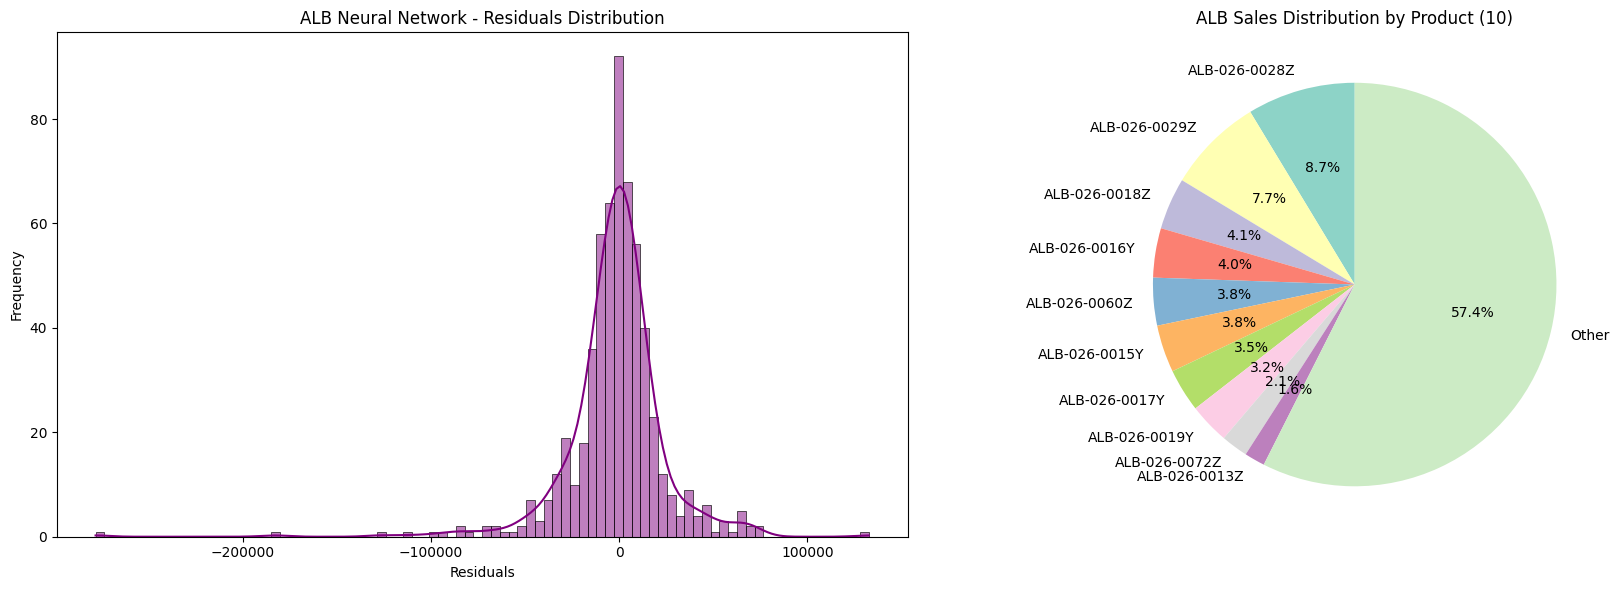

In [ ]:
# Create subplots (1 row, 2 columns: one for line plot, one for residual plot)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# Histogram of Residuals
sns.histplot(residuals, kde=True, color='purple', ax=axes[0])
axes[0].set_title(f'{custom_ref} Neural Network - Residuals Distribution', fontsize=12)
axes[0].set_xlabel('Residuals')
axes[0].set_ylabel('Frequency')

# Pie Chart of Product Order Quantity (Top {number} + Other)
product_sales = df.groupby('ProductNumber')['OrderQuantity'].sum()  # Group by product and sum order quantities

# Get the top 20 products by sales
top_products = product_sales.nlargest(10)

# Group the remaining products as 'Other'
other_sales = product_sales.drop(top_products.index).sum()
top_products['Other'] = other_sales

# Plot the pie chart
top_products.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3', len(top_products)))
axes[1].set_title(f'{custom_ref} Sales Distribution by Product ({len(top_products) - 1})', fontsize=12)
axes[1].set_ylabel('')  # Hide the y-label for the pie chart

plt.tight_layout()
plt.show()

In [ ]:
customer_total.head()

,ProductNumber,order_year,order_month,order_week,order_weekday,is_weekend,Customer_Num,OrderQuantity,prev_month_sales,prev_week_sales,...,moving_avg_3m,moving_avg_6m,moving_avg_12m,moving_avg_18m,sales_2022,sales_2023,sales_2024,growth_2023,growth_2024,PhysicalInv
0,ALB-005-0022Y,2024,9,39,0,0,191.0,160000,110031.53337,110031.53337,...,160000.000000,160000.000000,160000.000000,160000.000000,0,0,160000,NaN,inf,8000
1,ALB-005-0022Z,2024,7,30,1,0,191.0,96000,110031.53337,110031.53337,...,96000.000000,96000.000000,96000.000000,96000.000000,0,0,96000,NaN,inf,0
2,ALB-005-0023Y,2024,11,45,1,0,191.0,72000,88000.00000,88000.00000,...,57333.333333,57333.333333,57333.333333,57333.333333,0,0,72000,NaN,inf,8000
3,ALB-005-0023Y,2024,12,1,0,0,191.0,12000,110031.53337,110031.53337,...,12000.000000,12000.000000,12000.000000,12000.000000,0,0,12000,NaN,inf,8000
4,ALB-005-0023Y,2024,12,49,3,0,191.0,88000,12000.00000,12000.00000,...,50000.000000,50000.000000,50000.000000,50000.000000,0,0,88000,NaN,inf,8000


In [ ]:
# Convert order year and month to datetime format
customer_total['OrderDate'] = pd.to_datetime(customer_total[['order_year', 'order_month']].astype(str).agg('-'.join, axis=1))

# Sort by OrderDate to maintain time order
customer_total = customer_total.sort_values(by='OrderDate')

In [ ]:
customer_total.head()

,ProductNumber,order_year,order_month,order_week,order_weekday,is_weekend,Customer_Num,OrderQuantity,prev_month_sales,prev_week_sales,...,moving_avg_6m,moving_avg_12m,moving_avg_18m,sales_2022,sales_2023,sales_2024,growth_2023,growth_2024,PhysicalInv,OrderDate
394,ALB-026-0007Z,2023,4,15,1,0,191.0,75000,110031.53337,110031.53337,...,75000.0,75000.000000,75000.000000,0,75000,0,inf,-100.0,0,2023-04-01
557,ALB-026-0016Z,2023,4,16,4,0,191.0,19000,110031.53337,110031.53337,...,19000.0,19000.000000,19000.000000,0,19000,0,inf,-100.0,0,2023-04-01
287,ALB-026-0001Z,2023,4,14,4,0,191.0,60000,60000.00000,60000.00000,...,50000.0,53333.333333,52857.142857,0,60000,0,inf,-100.0,15000,2023-04-01
531,ALB-026-0015Z,2023,4,16,4,0,191.0,19000,110031.53337,110031.53337,...,19000.0,19000.000000,19000.000000,0,19000,0,inf,-100.0,0,2023-04-01
716,ALB-026-0023Z,2023,6,25,0,0,191.0,150000,60000.00000,60000.00000,...,72500.0,70833.333333,76388.888889,0,150000,0,inf,-100.0,95000,2023-06-01


In [ ]:
# total_y_val.type

In [ ]:
# total_y_val.type

In [ ]:
# Convert order year and month to datetime format
customer_total['OrderDate'] = pd.to_datetime(customer_total[['order_year', 'order_month']].astype(str).agg('-'.join, axis=1))

# Sort by OrderDate to maintain time order
customer_total = customer_total.sort_values(by='OrderDate')

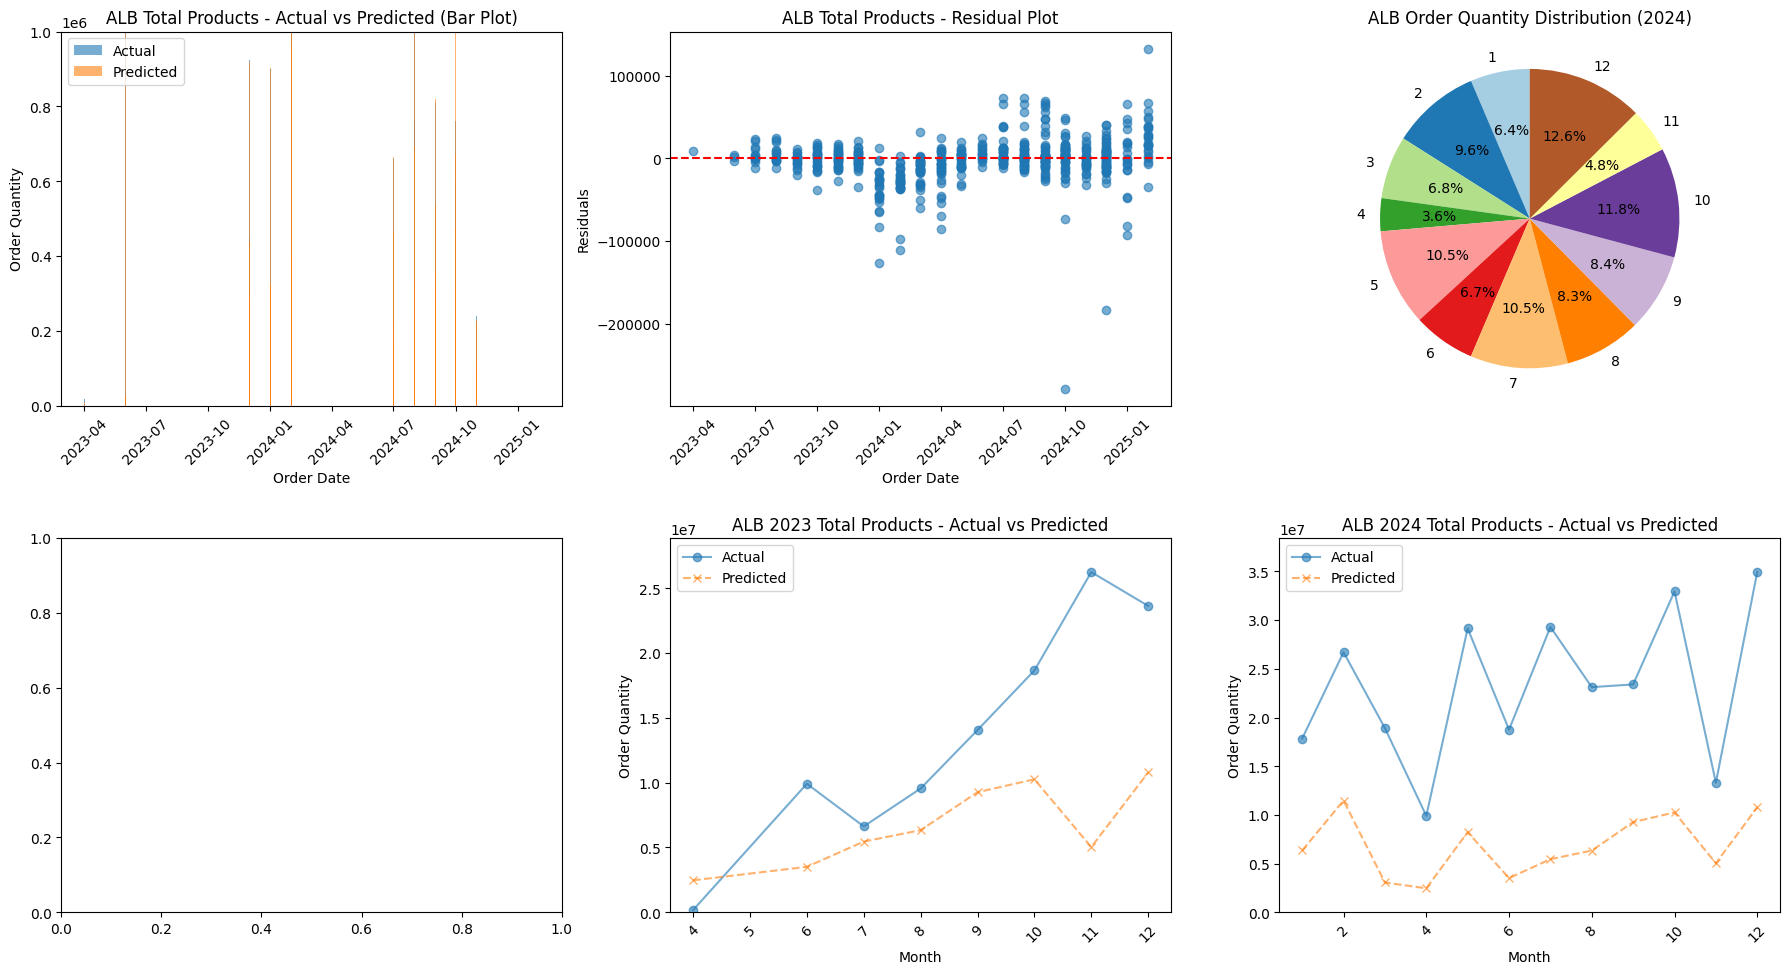

In [ ]:
s